## Training object detection model

Reference GitHub: https://medium.com/fullstackai/how-to-train-an-object-detector-with-your-own-coco-dataset-in-pytorch-319e7090da5

In [1]:

import os
import torch
import torchvision
from tqdm import tqdm
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pycocotools.coco import COCO

from utils import get_model_object_detection, myOwnDataset, InferDataset, get_iou, compute_metrics, get_all_metrics

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Check training 

In [8]:
df = pd.read_csv('output_metrics_full_v2.csv')

<AxesSubplot:>

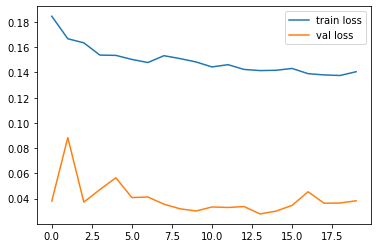

In [9]:
df[['train loss', 'val loss']].plot()

<AxesSubplot:>

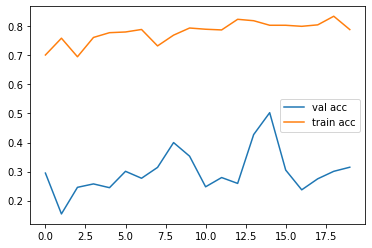

In [10]:
df[['val acc', 'train acc']].plot()

<AxesSubplot:>

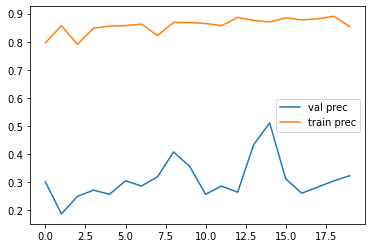

In [11]:
df[['val prec', 'train prec']].plot()

<AxesSubplot:>

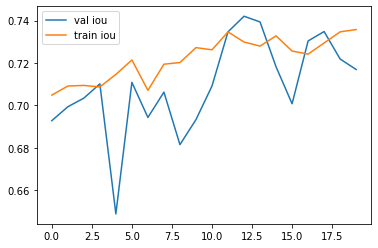

In [12]:
df[['val iou','train iou']].plot()

# Evaluation

In [7]:
model = get_model_object_detection(6)

model.load_state_dict(torch.load(os.getcwd() + '/output_model_temp_full_v0.pt')['model']) #if only CPU available 
model = model.to('cuda')
model.eval()
print('... model loaded.')

RuntimeError: Error(s) in loading state_dict for FasterRCNN:
	size mismatch for backbone.body.conv1.weight: copying a param with shape torch.Size([64, 9, 7, 7]) from checkpoint, the shape in current model is torch.Size([64, 3, 7, 7]).
	size mismatch for roi_heads.box_predictor.cls_score.weight: copying a param with shape torch.Size([2, 1024]) from checkpoint, the shape in current model is torch.Size([6, 1024]).
	size mismatch for roi_heads.box_predictor.cls_score.bias: copying a param with shape torch.Size([2]) from checkpoint, the shape in current model is torch.Size([6]).
	size mismatch for roi_heads.box_predictor.bbox_pred.weight: copying a param with shape torch.Size([8, 1024]) from checkpoint, the shape in current model is torch.Size([24, 1024]).
	size mismatch for roi_heads.box_predictor.bbox_pred.bias: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([24]).

In [ ]:
model.eval()

data = next(iter(dataloader))

imgs, annotations = data
imgs = list(img.float().to(device) for img in imgs)
annotations = [{k: v.to(device) for k, v in t.items()} for t in annotations]
pred = model(imgs)

boxes = []
gt_box = []

for j, p in enumerate(pred):
    cond = p['scores'] > 0.8
    boxes.append(p['boxes'][cond])
    gt_box.append(annotations[j]['boxes'])

In [ ]:
print('Groundtruth')
print(gt_box)
print('')

print('Predictions')
print(boxes)

In [ ]:
metrics = []

for i in range(2):
    metrics.append(compute_metrics(model, imgs, annotations))


In [ ]:
for i in range(len(imgs)):
    miou, prec, rec, acc = compute_metrics(model, imgs[i:i+1], annotations[i:i+1])
    print(miou, prec, rec, acc)

In [ ]:
prec, rec, acc

# Thinking

when pred = [], returns iou = 0, Labels = 0, best_iou = 0

when gt = [], error

tp : number box found
tn : corectly not found
fp : boxe found where should not
fn : boxe missing